# K-Means Clustering
---
## 1. 임의의 1000개 (x, y) 데이터 생성
### 필요 모듈 Import

In [1]:
import random
import matplotlib.pyplot as plt

### 튜플 points 생성 및 플로팅

[(44, 62), (34, 44), (11, 68), (59, 59), (2, 38), (64, 33), (92, 79), (22, 84), (7, 78), (26, 3), (27, 81), (51, 10), (57, 88), (37, 60), (45, 68), (62, 34), (98, 55), (41, 63), (91, 17), (68, 39), (90, 15), (66, 95), (92, 47), (69, 83), (59, 78), (25, 29), (28, 92), (57, 35), (66, 97), (48, 56), (92, 17), (92, 17), (7, 87), (57, 3), (77, 33), (99, 54), (9, 10), (48, 83), (4, 48), (8, 20), (22, 19), (89, 23), (56, 98), (18, 10), (47, 100), (99, 17), (66, 55), (37, 29), (57, 73), (99, 40), (33, 57), (38, 15), (71, 24), (17, 91), (42, 36), (36, 64), (0, 96), (99, 86), (13, 96), (35, 18), (57, 14), (46, 47), (71, 32), (83, 1), (33, 85), (81, 28), (39, 42), (66, 75), (32, 25), (59, 46), (29, 70), (75, 53), (92, 20), (100, 12), (71, 43), (29, 92), (5, 48), (58, 2), (57, 76), (77, 94), (82, 29), (44, 76), (19, 52), (81, 9), (99, 54), (58, 50), (47, 42), (27, 74), (52, 98), (24, 87), (96, 13), (69, 98), (47, 16), (67, 43), (53, 0), (70, 60), (89, 52), (72, 17), (61, 65), (20, 3), (62, 23), (3

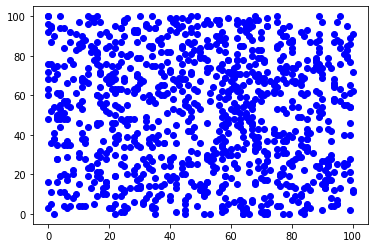

In [2]:
N = 1000
MAX_X, MAX_Y = (100, 100)

points = [(random.randint(0, MAX_X), random.randint(0, MAX_X)) for _ in range(N)]
print(points)

for x, y in points:
    plt.scatter(x, y, c="b")
plt.show()

## 2. K 개의 Random - Centroid 지정
### 튜플 centroids 생성

[(77, 2), (46, 14), (55, 41), (54, 30), (77, 25), (15, 45), (15, 68), (50, 3), (29, 79), (31, 48)]


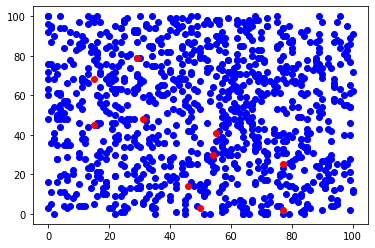

In [3]:
K = 10
centroids = [(random.randint(0, MAX_X), random.randint(0, MAX_Y)) for _ in range(K)]
print(centroids)

for x, y in points:
    plt.scatter(x, y, c="b")
for x, y in centroids:
    plt.scatter(x, y, c="r")
plt.show()

## 3. Centroid 에 가까운 점 매핑하기
### Centroid 와 모든 점과의 거리(distance) 계산
$ distance = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2} $

In [4]:
def distance(centroid, points):
    cx, cy = centroid
    d = [((cx - x)**2 + (cy - y)**2)**0.5 for x, y in points]
    return d

distances = []
for c in centroids:
    distances.append(distance(c, points))
print(f"({len(distances)},{len(distances[0])})")

(10,1000)


### 각 점을 가장 가까운 centroid 와 매칭

[9, 9, 6, 2, 5, 3, 2, 8, 6, 1, 8, 1, 8, 9, 8, 3, 4, 9, 4, 2, 4, 8, 4, 8, 8, 5, 8, 3, 8, 2, 4, 4, 6, 7, 4, 4, 5, 8, 5, 5, 1, 4, 8, 1, 8, 4, 2, 3, 8, 4, 9, 1, 4, 8, 3, 8, 6, 2, 8, 1, 1, 2, 4, 0, 8, 4, 9, 2, 1, 2, 8, 2, 4, 0, 2, 8, 5, 7, 8, 8, 4, 8, 5, 0, 4, 2, 2, 8, 8, 8, 0, 8, 1, 2, 7, 2, 4, 4, 2, 1, 3, 8, 8, 5, 9, 4, 2, 7, 3, 4, 1, 2, 4, 4, 2, 2, 6, 8, 8, 8, 3, 8, 6, 5, 9, 6, 8, 1, 4, 8, 8, 9, 0, 1, 5, 2, 7, 0, 1, 0, 9, 5, 7, 2, 5, 6, 2, 6, 8, 4, 4, 9, 2, 6, 7, 8, 9, 4, 2, 4, 6, 8, 9, 8, 1, 1, 7, 1, 4, 2, 2, 4, 0, 6, 1, 5, 2, 3, 8, 1, 1, 1, 5, 8, 7, 4, 8, 2, 9, 4, 8, 8, 3, 6, 1, 2, 9, 3, 0, 0, 5, 6, 8, 9, 1, 1, 6, 6, 9, 1, 6, 1, 8, 2, 1, 2, 7, 1, 2, 2, 8, 1, 2, 4, 4, 0, 8, 8, 8, 8, 6, 8, 1, 8, 6, 4, 2, 3, 2, 7, 4, 5, 2, 8, 2, 9, 8, 8, 9, 6, 6, 2, 1, 2, 8, 1, 9, 8, 4, 8, 3, 0, 4, 2, 8, 6, 2, 1, 3, 1, 8, 6, 5, 6, 1, 9, 2, 8, 8, 3, 8, 4, 6, 8, 8, 8, 0, 8, 9, 9, 7, 8, 8, 1, 4, 1, 6, 8, 1, 6, 6, 9, 8, 2, 5, 6, 6, 2, 0, 7, 2, 4, 8, 8, 8, 4, 8, 9, 2, 9, 9, 1, 0, 8, 4, 5, 2, 2, 8, 4, 2, 2, 4, 

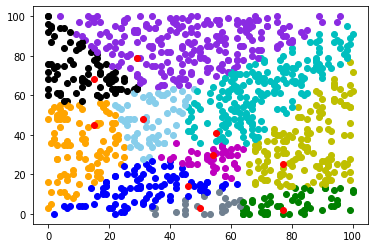

In [5]:
label = []
for i in range(len(points)):
    md = 999999
    idx = 0
    for l, d in enumerate(distances):
        if d[i] < md:
            md = d[i]
            idx = l
    label.append(idx)
print(label)

COLORS = ['g', 'b', 'c', 'm', 'y', 'orange', 'k', 'slategray', 'blueviolet', 'skyblue']

for i, (x, y) in enumerate(points):
    plt.scatter(x, y, c=COLORS[label[i]])
for x, y in centroids:
    plt.scatter(x, y, c="r")
plt.show()

## 4. 나눠진 점들의 평균점으로 Centroid를 이동
### 각 구역별 평균점 구하기

centroid_0 = (80.43396226415095, 5.39622641509434)
centroid_1 = (31.74736842105263, 12.83157894736842)
centroid_2 = (71.0, 62.7989417989418)
centroid_3 = (53.7, 28.025)
centroid_4 = (84.49305555555556, 34.96527777777778)
centroid_5 = (10.72340425531915, 34.41489361702128)
centroid_6 = (11.674698795180722, 72.71084337349397)
centroid_7 = (51.391304347826086, 4.0)
centroid_8 = (46.328828828828826, 86.32882882882883)
centroid_9 = (34.0, 47.80701754385965)


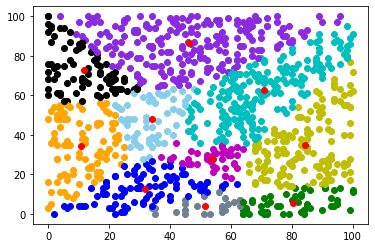

In [6]:
sum_points = [[[], []] for _ in range(len(label))]
for i, (x, y) in enumerate(points):
    idx = label[i]
    sum_points[idx][0].append(x)
    sum_points[idx][1].append(y)
    
for i, (x, y) in enumerate(centroids):
    avg_x = sum(sum_points[i][0]) / len(sum_points[i][0])
    avg_y = sum(sum_points[i][1]) / len(sum_points[i][1])
    centroids[i] = (avg_x, avg_y)
    print(f"centroid_{i} = {centroids[i]}")
    
for i, (x, y) in enumerate(points):
    plt.scatter(x, y, c=COLORS[label[i]])
for x, y in centroids:
    plt.scatter(x, y, c="r")

### 이동된 Centroid 의 거리 및 label 재계산

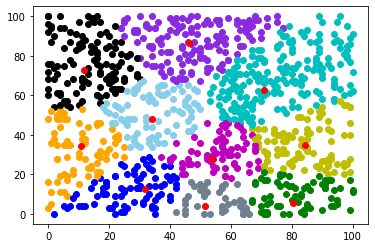

In [7]:
distances = []
for c in centroids:
    distances.append(distance(c, points))

label = []
for i in range(len(points)):
    md = 999999
    idx = 0
    for l, d in enumerate(distances):
        if d[i] < md:
            md = d[i]
            idx = l
    label.append(idx)

for i, (x, y) in enumerate(points):
    plt.scatter(x, y, c=COLORS[label[i]])
for x, y in centroids:
    plt.scatter(x, y, c="r")
plt.show()

## 5. 모든 과정 함수화
### N개의 점 랜덤생성 - points

In [18]:
def random_points():
    points = [(random.randint(0, MAX_X), random.randint(0, MAX_X)) for _ in range(N)]
    return points

### K개의 Centroid 랜덤생성 - centroids

In [9]:
def random_centroids():
    centroids = [(random.randint(0, MAX_X), random.randint(0, MAX_Y)) for _ in range(K)]
    return centroids

### 각 Centroid 에 대한 모든 점의 distance 및 label 구하기

In [10]:
def distance(centroid, points):
    cx, cy = centroid
    d = [((cx - x)**2 + (cy - y)**2)**0.5 for x, y in points]
    return d

def set_label_distance(centroids, points):
    distances = []
    for c in centroids:
        distances.append(distance(c, points))
    label = []
    for i in range(len(points)):
        md = 999999
        idx = 0
        for l, d in enumerate(distances):
            if d[i] < md:
                md = d[i]
                idx = l
        label.append(idx)
    return label

### label 평균점으로 Centroid 이동

In [11]:
def set_avg_centroid(centroids, points, label):
    sum_points = [[[], []] for _ in range(len(label))]
    for i, (x, y) in enumerate(points):
        idx = label[i]
        sum_points[idx][0].append(x)
        sum_points[idx][1].append(y)

    for i, (x, y) in enumerate(centroids):
        avg_x = sum(sum_points[i][0]) / len(sum_points[i][0])
        avg_y = sum(sum_points[i][1]) / len(sum_points[i][1])
        centroids[i] = (avg_x, avg_y)
    return centroids

### Centroid 비교

In [12]:
def compare_centroids(old_centroids, new_centroids):
    for i in range(len(old_centroids)):
        if old_centroids[i] != new_centroids[i]:
            return False
    return True

### 플로팅

In [13]:
def show_animation(camera, ax, centroids, points, label):
    for i, (x, y) in enumerate(points):
        ax.scatter(x, y, c=COLORS[label[i]])
    for x, y in centroids:
        ax.scatter(x, y, c="r")
    camera.snap()
    
def show_plot(centroids, points, label):
    for i, (x, y) in enumerate(points):
        plt.scatter(x, y, c=COLORS[label[i]])
    for x, y in centroids:
        plt.scatter(x, y, c="r")
    plt.show()

## 6. 실제 구현
### set parameters

In [14]:
# max width, max height
MAX_X, MAX_Y = (100, 100)

# Random points
N = 1000

# Random centroids
K = 10

# Color set
COLORS = ['g', 'b', 'c', 'm', 'y', 'orange', 'k', 'slategray', 'blueviolet', 'skyblue']

### 구현

Loop_1 start !


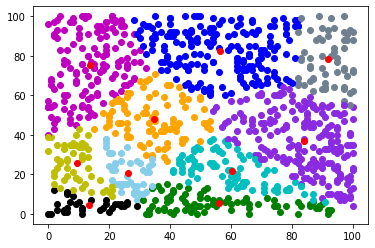

Loop_2 start !


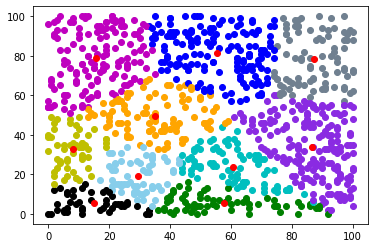

Loop_3 start !


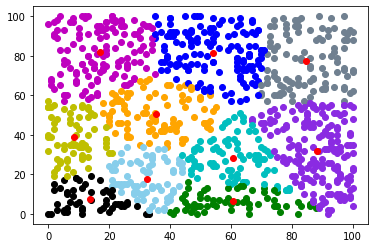

Loop_4 start !


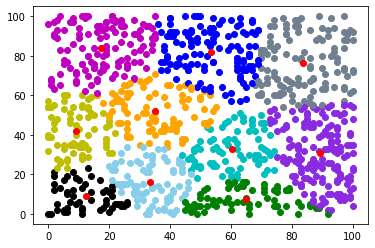

Loop_5 start !


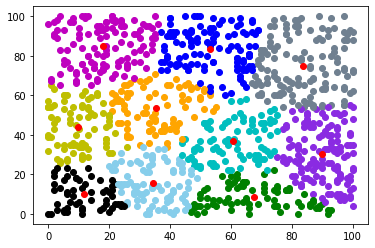

Loop_6 start !


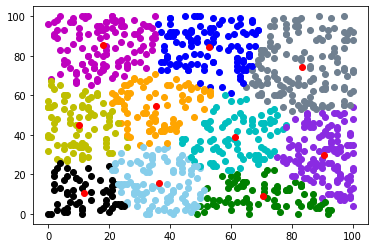

Loop_7 start !


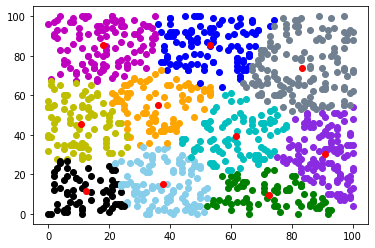

Loop_8 start !


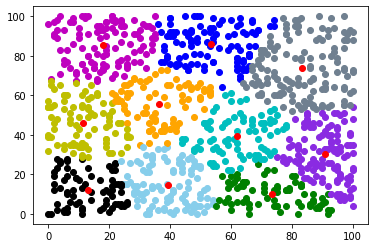

Loop_9 start !


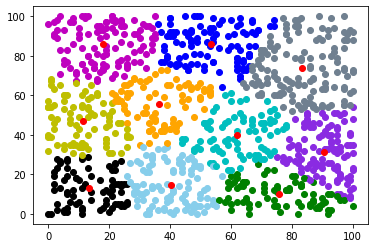

Loop_10 start !


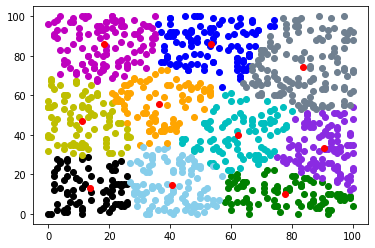

Loop_11 start !


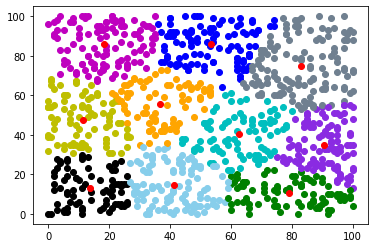

Loop_12 start !


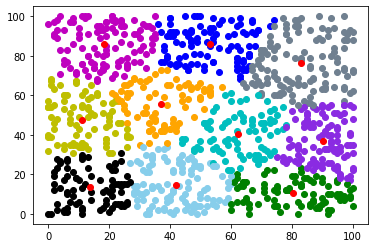

Loop_13 start !


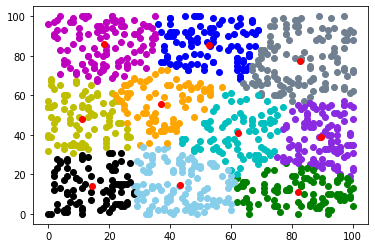

Loop_14 start !


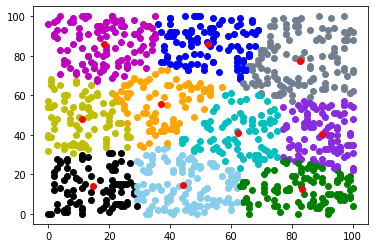

Loop_15 start !


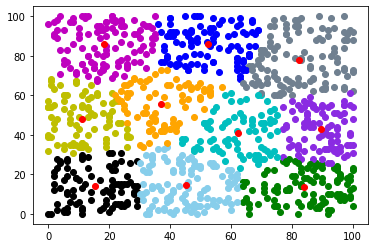

Loop_16 start !


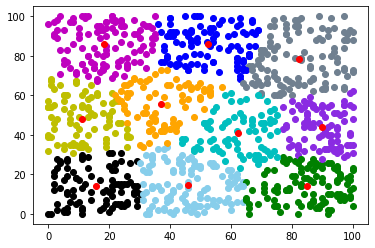

Loop_17 start !


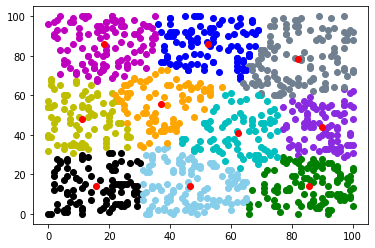

Loop_18 start !


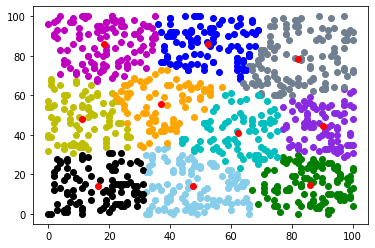

Loop_19 start !


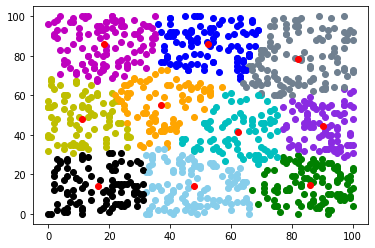

Loop_20 start !


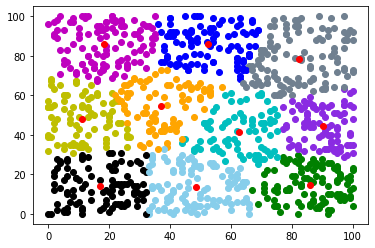

Loop_21 start !


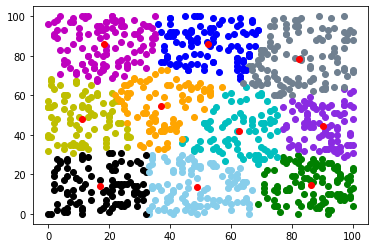

Loop_22 start !


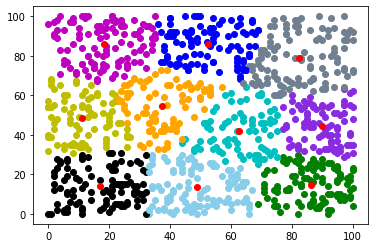

Loop_23 start !


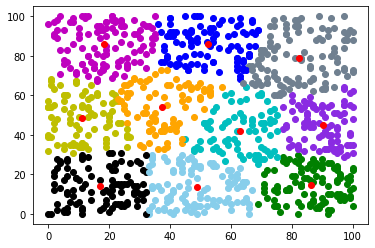

Loop_24 start !


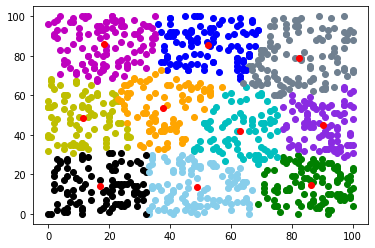

Loop_25 start !


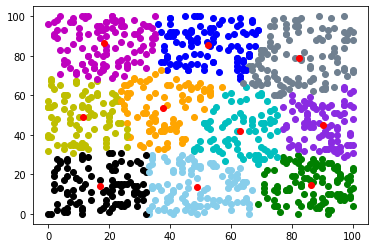

Loop_26 start !


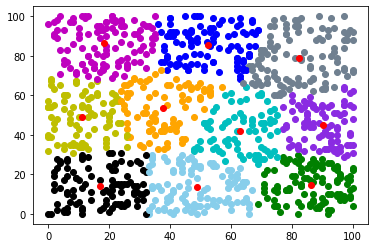

Loop_27 start !


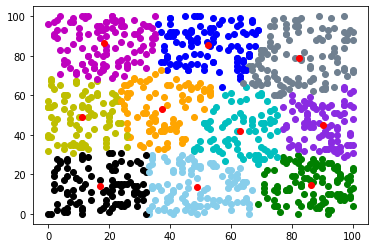

Loop_28 start !


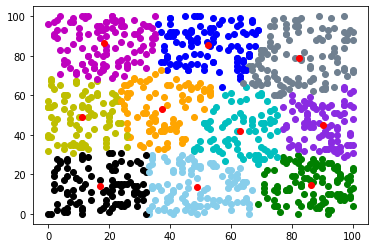

Loop end.


In [19]:
import copy
from IPython.display import Image
from celluloid import Camera

centroids = random_centroids()
points = random_points()
loop = 0

fig = plt.figure()
ax = fig.subplots()
camera = Camera(fig)

while True:
    loop += 1
    print(f"Loop_{loop} start !")

    label = set_label_distance(centroids, points)
    old_centroids = copy.deepcopy(centroids)
    centroids = set_avg_centroid(centroids, points, label)
    show_plot(centroids, points, label)
    if compare_centroids(old_centroids, centroids):
        break
        
print("Loop end.")
#animation = camera.animate(interval=1000, blit=True)
#animation.save('plot.gif')
#Image('plot.gif')

---
# LBG Algorithm
K-Means 를 사용하는 것은 같으나, K 개의 랜덤 Centroid 가 아닌, 1 -> 2 -> 4 -> 8 -> ... -> K 개의 Centroid 로 나누어 가는 과정의 Clustering  
## 1. 분할 방법 정의
### set parameters

In [20]:
# max width, max height
MAX_X, MAX_Y = (100, 100)

# Random points
N = 1000

# Random centroids
K = 10

# Color set
COLORS = ['g', 'b', 'c', 'm', 'y', 'orange', 'k', 'slategray', 'blueviolet', 'skyblue']

### 첫 Centroid 는 모든 점의 평균지점으로 설정

[(51.117, 49.991)]


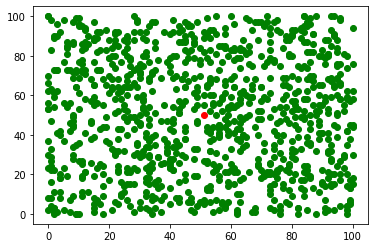

In [21]:
# 모든 점에 대한 평균이 시작점
points = random_points()
centroids = [
    list(map(lambda x: x[0], points)),
    list(map(lambda x: x[1], points))
]
centroids = [(sum(centroids[0]) / len(centroids[0]), sum(centroids[1]) / len(centroids[1]))]
print(centroids)
label = set_label_distance(centroids, points)
show_plot(centroids, points, label)

### Centroid 기준으로 세로 분할
x 좌표가 두 구역으로 나뉘고, y좌표는 자유

[(34, 48), (61, 85)]


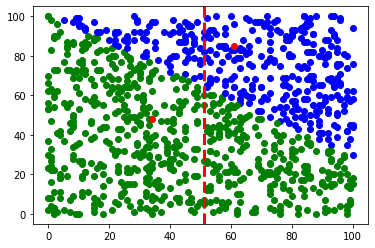

In [22]:
target_centroid = centroids[0]
new_centroid = [
    (random.randint(0, int(target_centroid[0])), random.randint(0, MAX_Y)),
    (random.randint(int(target_centroid[0]), MAX_X), random.randint(0, MAX_Y)),
]
print(new_centroid)
del centroids[0]
for c in new_centroid:
    centroids.append(c)
label = set_label_distance(centroids, points)
plt.axvline(x=int(target_centroid[0]), color='r', linestyle='--', linewidth=3)
show_plot(centroids, points, label)

### K-Means 수행

Loop_1 start !
Loop_2 start !
Loop_3 start !
Loop_4 start !
Loop_5 start !
Loop_6 start !
Loop_7 start !
Loop_8 start !
Loop_9 start !
Loop_10 start !
Loop_11 start !
Loop_12 start !
Loop_13 start !
Loop_14 start !
Loop_15 start !
Loop end.


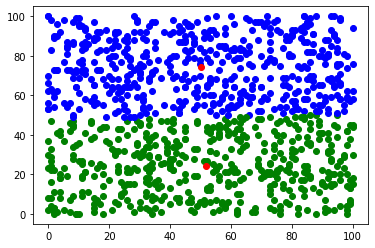

In [23]:
loop = 0
while True:
    loop += 1
    print(f"Loop_{loop} start !")

    label = set_label_distance(centroids, points)
    old_centroids = copy.deepcopy(centroids)
    centroids = set_avg_centroid(centroids, points, label)
    if compare_centroids(old_centroids, centroids):
        break
print("Loop end.")
show_plot(centroids, points, label)

### 다음 분할 범위 구하기
해당 구역(label)에 속하는 집단의 최소~최대 x,y 값이 최대 범위가 된다. 세로 분할은 그대로 유지한다.

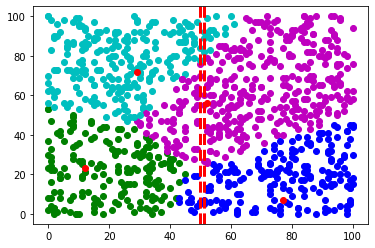

In [24]:
delete_idx = []
append_centroids = []
for i, target in enumerate(centroids):
    check = [idx for idx, x in enumerate(label) if x == i]
    x_range = list(map(lambda x: points[x][0], check))
    x_range = (min(x_range), max(x_range))
    y_range = list(map(lambda x: points[x][1], check))
    y_range = (min(y_range), max(y_range))
    
    new_centroid = [
        (random.randint(x_range[0], int(target[0])), random.randint(y_range[0], y_range[1])),
        (random.randint(int(target[0]), x_range[1]), random.randint(y_range[0], y_range[1])),
    ]
    plt.axvline(x=int(target[0]), color='r', linestyle='--', linewidth=3)
    for c in new_centroid:
        append_centroids.append(c)
    delete_idx.append(i)
    
delete_idx.sort(reverse=True)
for i in delete_idx:
    del centroids[i]
    
for c in append_centroids:
    centroids.append(c)
    
label = set_label_distance(centroids, points)
show_plot(centroids, points, label)

### 다시 K-Mean 수행

Loop_1 start !
Loop_2 start !
Loop_3 start !
Loop_4 start !
Loop_5 start !
Loop_6 start !
Loop_7 start !
Loop_8 start !
Loop_9 start !
Loop_10 start !
Loop_11 start !
Loop end.


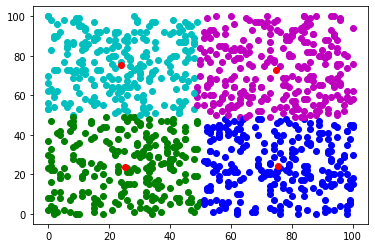

In [25]:
loop = 0
while True:
    loop += 1
    print(f"Loop_{loop} start !")

    label = set_label_distance(centroids, points)
    old_centroids = copy.deepcopy(centroids)
    centroids = set_avg_centroid(centroids, points, label)
    if compare_centroids(old_centroids, centroids):
        break
print("Loop end.")
show_plot(centroids, points, label)

## 2. 모든 과정 함수화
### centroid 분할

In [26]:
def div_centroids(centroids, points, label):
    delete_idx = []
    append_centroids = []
    max_len = len(centroids)
    if max_len * 2 > K:
        max_len = K - len(centroids)
    for i in range(0, max_len):
        target = centroids[i]
        check = [idx for idx, x in enumerate(label) if x == i]
        x_range = list(map(lambda x: points[x][0], check))
        x_range = (min(x_range), max(x_range))
        y_range = list(map(lambda x: points[x][1], check))
        y_range = (min(y_range), max(y_range))

        new_centroid = [
            (random.randint(x_range[0], int(target[0])), random.randint(y_range[0], y_range[1])),
            (random.randint(int(target[0]), x_range[1]), random.randint(y_range[0], y_range[1])),
        ]
        plt.axvline(x=int(target[0]), color='r', linestyle='--', linewidth=3)
        for c in new_centroid:
            append_centroids.append(c)
        delete_idx.append(i)

    delete_idx.sort(reverse=True)
    for i in delete_idx:
        del centroids[i]

    for c in append_centroids:
        centroids.append(c)
    return centroids

### 플로팅

In [30]:
def show_plot_img(centroids, points, label, filename):
    for i, (x, y) in enumerate(points):
        plt.scatter(x, y, c=COLORS[label[i]])
    for x, y in centroids:
        plt.scatter(x, y, c="r")
    plt.savefig(f'{filename}.png')
    plt.show()

## 6. 실제 구현
### set parameters

In [27]:
# max width, max height
MAX_X, MAX_Y = (100, 100)

# Random points
N = 1000

# Random centroids
K = 10

# Color set
COLORS = ['g', 'b', 'c', 'm', 'y', 'orange', 'k', 'slategray', 'blueviolet', 'skyblue']

### 구현

Loop_1 start !


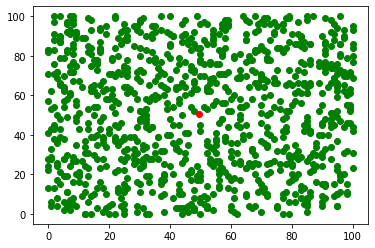

Loop_2 start !


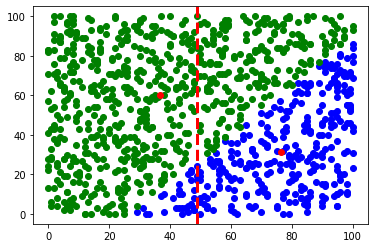

Loop_3 start !


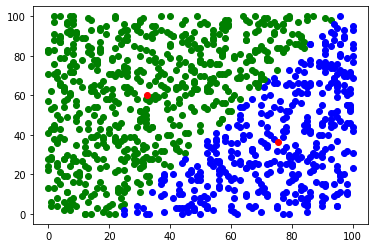

Loop_4 start !


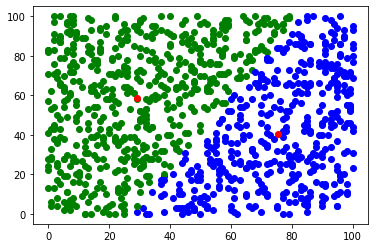

Loop_5 start !


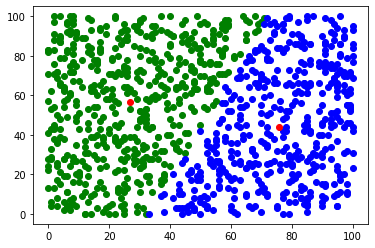

Loop_6 start !


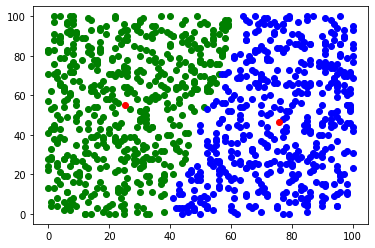

Loop_7 start !


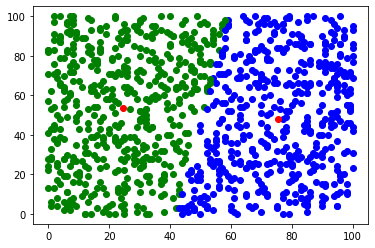

Loop_8 start !


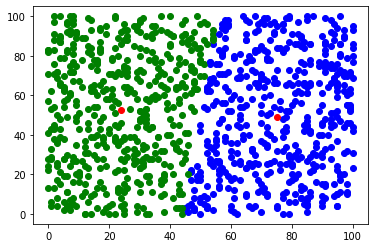

Loop_9 start !


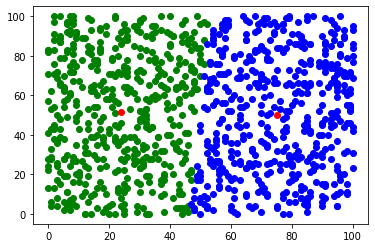

Loop_10 start !


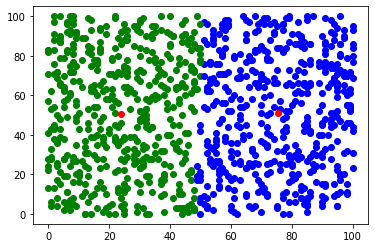

Loop_11 start !


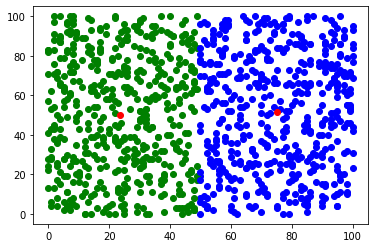

Loop_12 start !


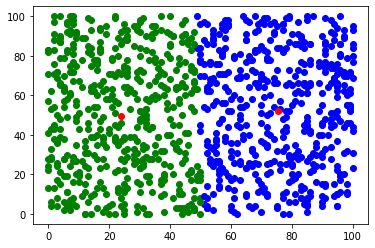

Loop_13 start !


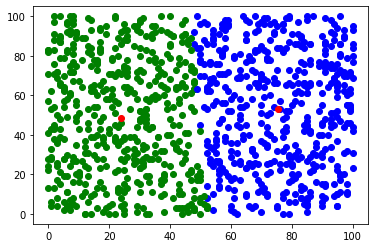

Loop_14 start !


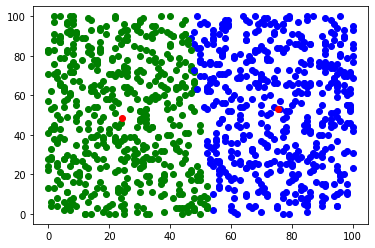

Loop_15 start !


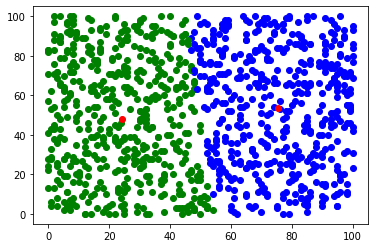

Loop_16 start !


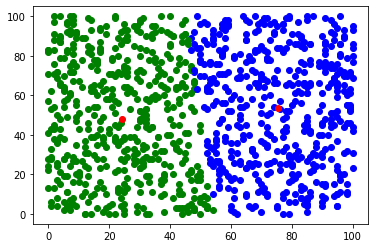

Loop_17 start !


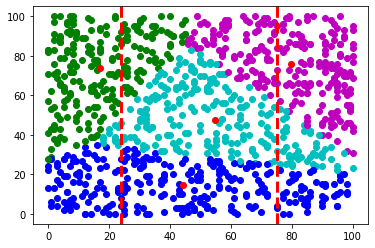

Loop_18 start !


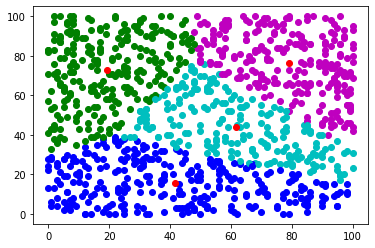

Loop_19 start !


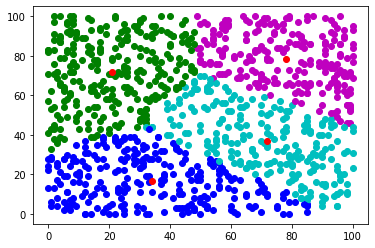

Loop_20 start !


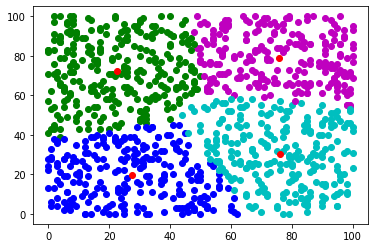

Loop_21 start !


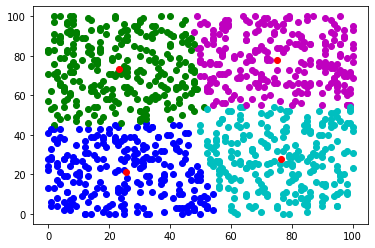

Loop_22 start !


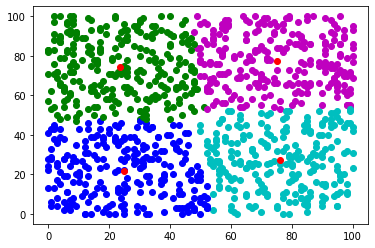

Loop_23 start !


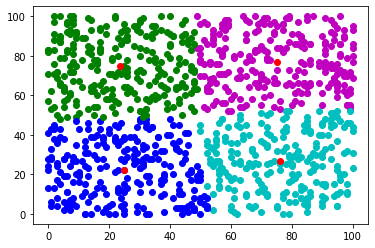

Loop_24 start !


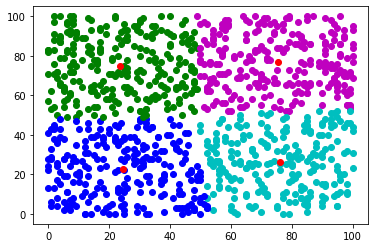

Loop_25 start !


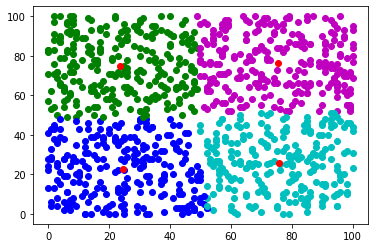

Loop_26 start !


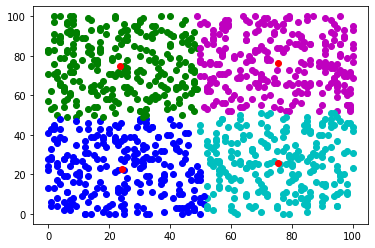

Loop_27 start !


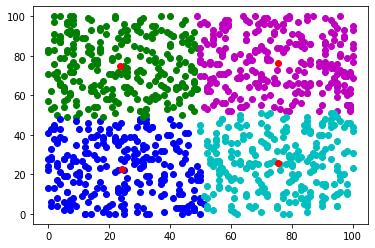

Loop_28 start !


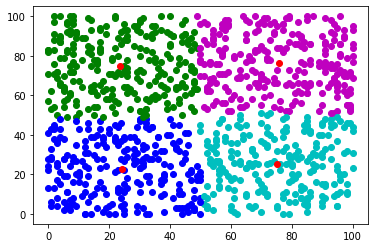

Loop_29 start !


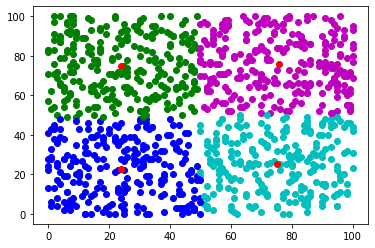

Loop_30 start !


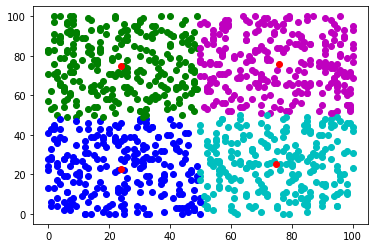

Loop_31 start !


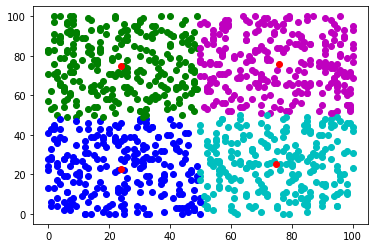

Loop_32 start !


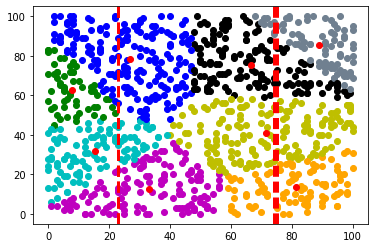

Loop_33 start !


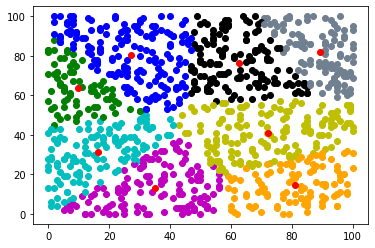

Loop_34 start !


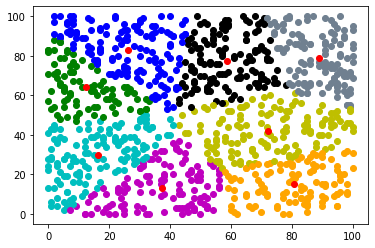

Loop_35 start !


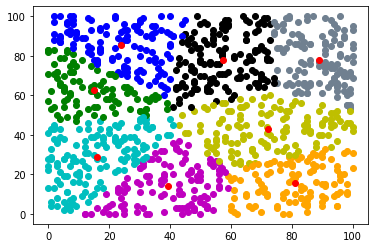

Loop_36 start !


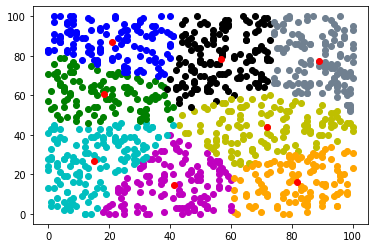

Loop_37 start !


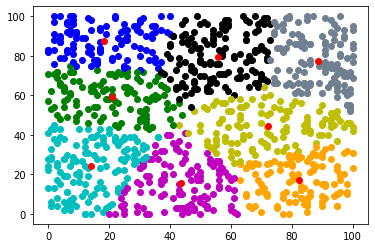

Loop_38 start !


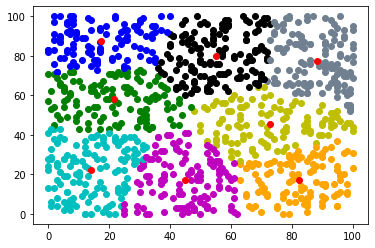

Loop_39 start !


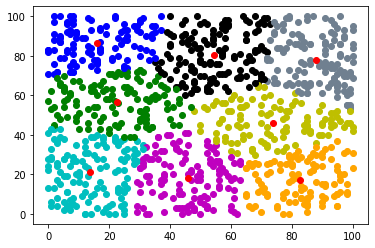

Loop_40 start !


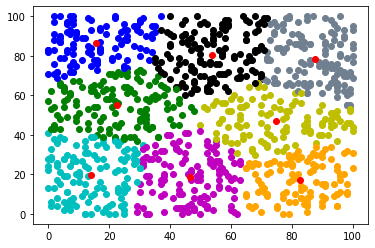

Loop_41 start !


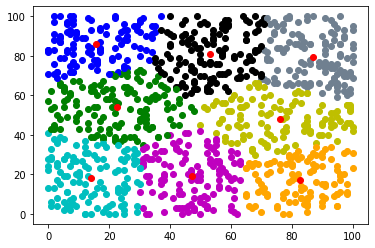

Loop_42 start !


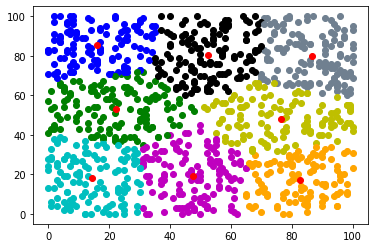

Loop_43 start !


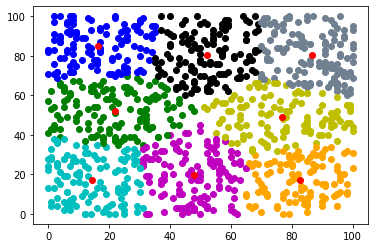

Loop_44 start !


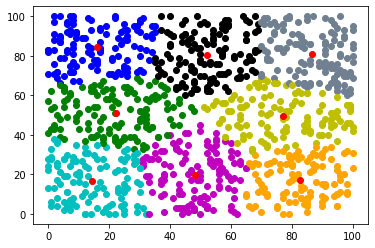

Loop_45 start !


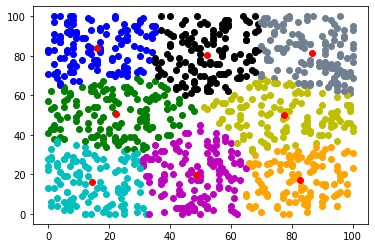

Loop_46 start !


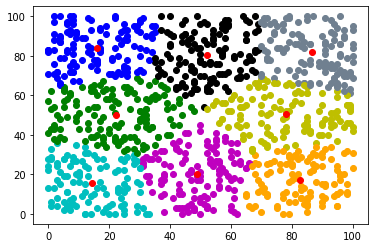

Loop_47 start !


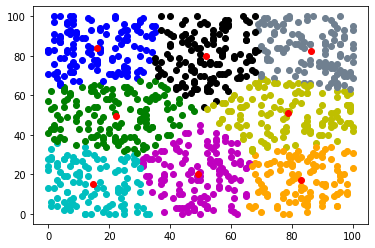

Loop_48 start !


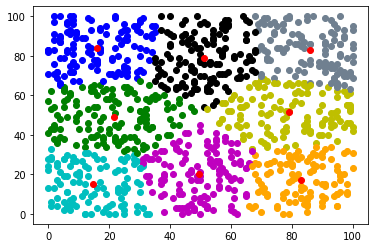

Loop_49 start !


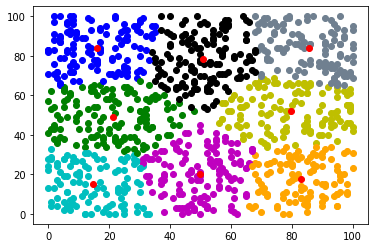

Loop_50 start !


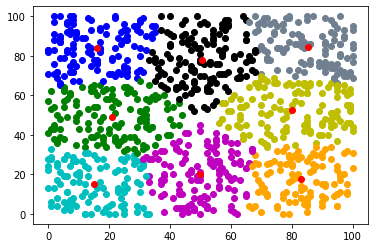

Loop_51 start !


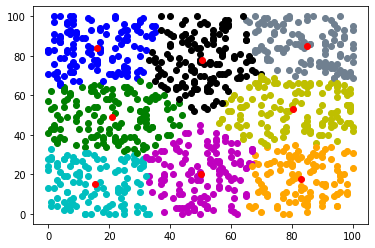

Loop_52 start !


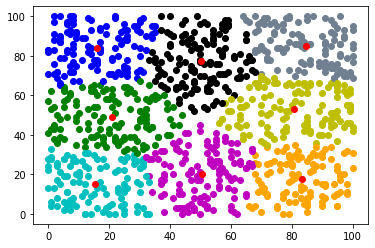

Loop_53 start !


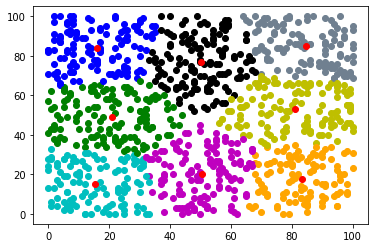

Loop_54 start !


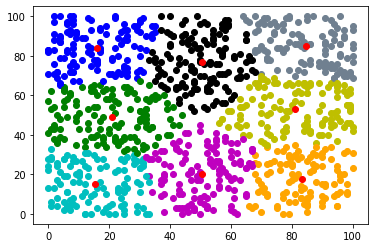

Loop_55 start !


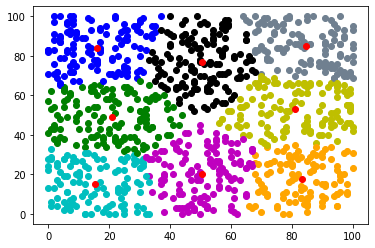

Loop_56 start !


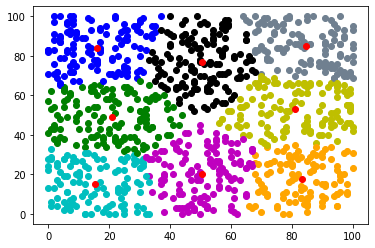

Loop_57 start !


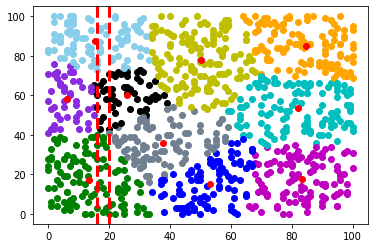

Loop_58 start !


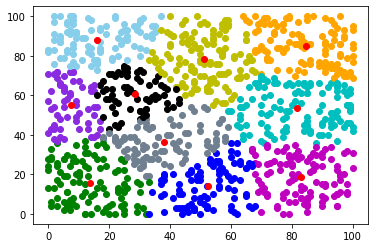

Loop_59 start !


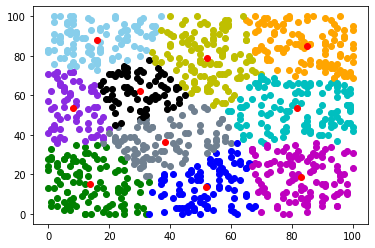

Loop_60 start !


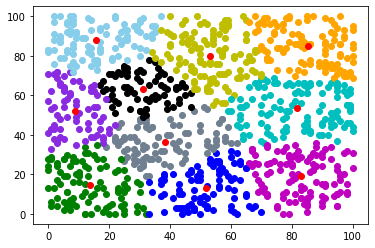

Loop_61 start !


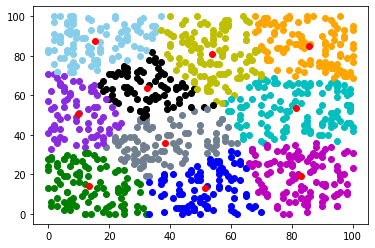

Loop_62 start !


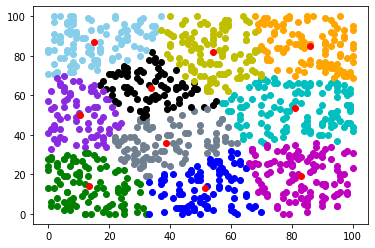

Loop_63 start !


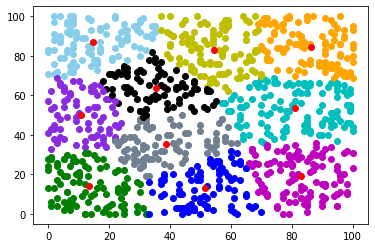

Loop_64 start !


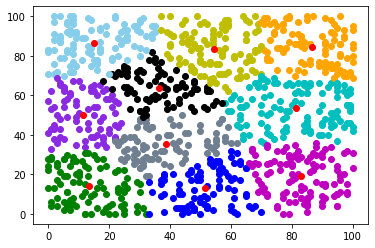

Loop_65 start !


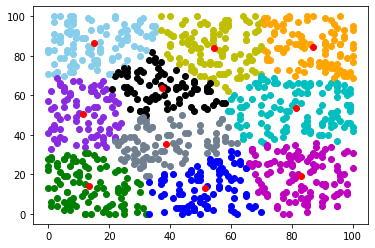

Loop_66 start !


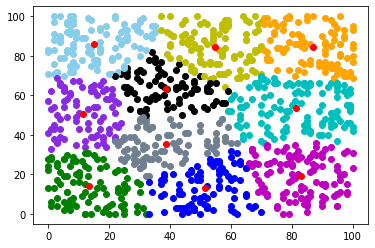

Loop_67 start !


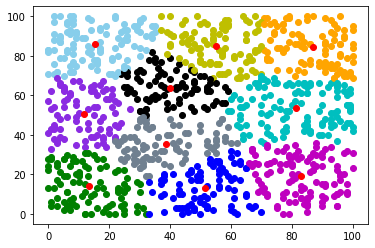

Loop_68 start !


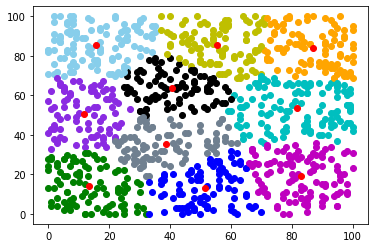

Loop_69 start !


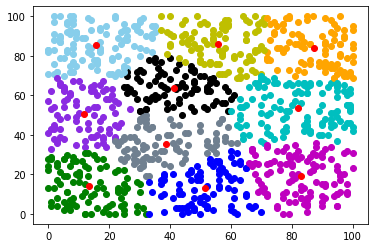

Loop_70 start !


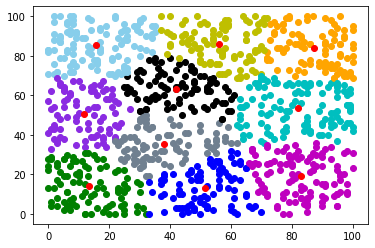

Loop_71 start !


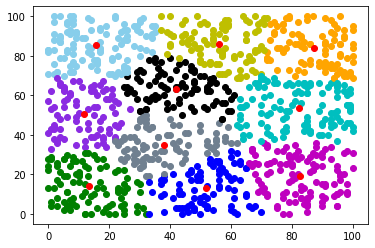

Loop_72 start !


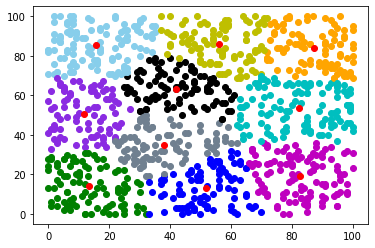

Loop end.


In [31]:
import copy

# 모든 점에 대한 평균이 시작점
points = random_points()
centroids = [
    list(map(lambda x: x[0], points)),
    list(map(lambda x: x[1], points))
]
centroids = [(sum(centroids[0]) / len(centroids[0]), sum(centroids[1]) / len(centroids[1]))]

loop = 0
while True:
    loop += 1
    print(f"Loop_{loop} start !")

    label = set_label_distance(centroids, points)
    old_centroids = copy.deepcopy(centroids)
    centroids = set_avg_centroid(centroids, points, label)
#     show_plot_img(centroids, points, label, f"LBG_LOOP_{loop}")
    
    if compare_centroids(old_centroids, centroids):
        if len(centroids) == K:
            break
        else:
            print("Div-Centroid")
            div_centroids(centroids, points, label)
        
print("Loop end.")
show_plot_img(centroids, points, label, f"LBG_LOOP_{loop}")
#animation = camera.animate(interval=1000, blit=True)
#animation.save('plot.gif')
#Image('plot.gif')